# E-tivity 1 (Weeks 1-2)

* Your Name

* Your Student ID

## Anomaly Detection

### Context
We have a mystery dataset. There are 9 explanatory variables and one response variable. The response variable is the last column and indicates if the sample is anomalous (=1, valid =0). The dataset is provided "data.csv". 

Of course in this case we could use supervised learning to generate a model and detect anomalies in new data. However the focus is on autoencoders, anomaly detection is just one of the potential uses for autoencoders.

So we are going to pretend that we do not know which data are anomalous but we do know that the anomaly rate is small. Use an autoencoder to detect anomalies in the data. The correctness of the model can of course be checked.

### Guidelines

The e-tivity is split into four tasks. The first three are "group" excersises, in that you post the solutions to Tasks 1-3 to a site. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to the Group Locker. 

Marks will be deducted if task 4 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-4 and with correct identification or filename.

Grading guidelines: the scores for each task are additive. Below is a link to the E-tivity rubrics.

https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=73310&rubricId=4445&originTool=quicklinks



## Problem

If you train even a modest feed forward network via supervised learning you can get extremely good recall and precision, despite the unbalanced dataset. However in this e-tivity you will determining the anomalies by using an autoencoder. That is you will **not** be using the Anom flag to guide the training.

The mystery dataset is available from Brightspace, download the csv file and use it as the input data.

### Tasks 1-3 (complete by Sunday Week 2)

Create additional cells to implement the tasks below. These task form the group learning section of the E-tivity. As such it is encouraged that you post yuor notebook in the group locker. 

Grading guidelines are given in the rubrics for the E-tivity

https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=73310&rubricId=4445&originTool=quicklinks

**Task 1: data preprocessing**

Explain any preprocessing steps you take and also how you have selected the training and test sets. Remember we do not know which samples are anomalous only that there are a small number of them compared to the total sample size.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [7]:
# Load data
df = pd.read_csv("data.csv")

X = df.iloc[:, :-1].values   # 9 features
y = df.iloc[:, -1].values   # anom feature 

In [8]:
df.shape

(49097, 10)

In [9]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'Anom'], dtype='object')

In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49097 entries, 0 to 49096
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      49097 non-null  int64
 1   V2      49097 non-null  int64
 2   V3      49097 non-null  int64
 3   V4      49097 non-null  int64
 4   V5      49097 non-null  int64
 5   V6      49097 non-null  int64
 6   V7      49097 non-null  int64
 7   V8      49097 non-null  int64
 8   V9      49097 non-null  int64
 9   Anom    49097 non-null  int64
dtypes: int64(10)
memory usage: 3.7 MB


In [11]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].describe())


Column: V1
count    49097.000000
mean        46.932399
std         12.875159
min         27.000000
25%         37.000000
50%         44.000000
75%         50.000000
max        126.000000
Name: V1, dtype: float64

Column: V2
count    49097.000000
mean        -0.063955
std         84.674481
min      -4821.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5075.000000
Name: V2, dtype: float64

Column: V3
count    49097.000000
mean        85.123124
std          8.877517
min         21.000000
25%         79.000000
50%         83.000000
75%         88.000000
max        149.000000
Name: V3, dtype: float64

Column: V4
count    49097.000000
mean         0.213231
std         37.579171
min      -3939.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3830.000000
Name: V4, dtype: float64

Column: V5
count    49097.000000
mean        36.871784
std         19.963113
min       -188.000000
25%         30.000000
50%         42.000000
75% 

In [12]:
X,y

(array([[ 50,  21,  77, ...,  27,  48,  22],
        [ 53,   0,  82, ...,  29,  30,   2],
        [ 37,   0,  76, ...,  40,  48,   8],
        ...,
        [ 49,   0,  87, ...,  38,  41,   2],
        [ 80,   0,  84, ...,   4, 120, 116],
        [ 37,   0, 103, ...,  66,  85,  20]]),
 array([1, 0, 0, ..., 0, 1, 0]))

In [13]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

In [14]:
# Scale features using training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Scaled features to pytorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

train_loader = DataLoader(
    TensorDataset(X_train_tensor),
    batch_size=32,
    shuffle=True
)

**Task 2: model generation and training**

Generate a suitable autoencoder model, the only restriction is that there should be only 2 latent variables. Train the model to a satistifactory result. Be aware that it will be much harder to achieve the sort of result you can get from a supervised learning model. 

**Hint**: it should not take longer than a 1000 epochs to train. However it may be difficult to train. Use different optimizers, topologies and/or weight initialisations to get convergence. Remember that achieving a perfect error means that the model will also be good at reconstructing anomalies. 


In [17]:
import torch.nn as nn

In [18]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(9, 6),
            nn.ReLU(),
            nn.Linear(6, 2)  # latent space, 2 variables 
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(2, 6),
            nn.ReLU(),
            nn.Linear(6, 9)
        )
        
    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat

In [19]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [20]:
num_epochs = 500
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    
    for (batch,) in train_loader:
        optimizer.zero_grad()
        recon = model(batch)
        loss = criterion(recon, batch)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    losses.append(epoch_loss / len(train_loader))
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {losses[-1]:.6f}")

Epoch 0, Loss: 0.687628
Epoch 50, Loss: 0.198094
Epoch 100, Loss: 0.188672
Epoch 150, Loss: 0.184563
Epoch 200, Loss: 0.181416
Epoch 250, Loss: 0.181234
Epoch 300, Loss: 0.180119
Epoch 350, Loss: 0.180423
Epoch 400, Loss: 0.179974
Epoch 450, Loss: 0.180295


**Task 3: anomaly detection**

From the histogram of the reconstruction error decide what the cutoff should be applied to distinguish anomalies from valid samples, given that the anomaly rate is ~7%.

In [22]:
with torch.no_grad():
    recon_test = model(X_test_tensor)
    # correct: mean squared error per sample over features
    recon_error = torch.mean((recon_test - X_test_tensor) ** 2, dim=1).numpy()

In [23]:
print("X_test_tensor shape:", X_test_tensor.shape)
print("recon_test shape:", recon_test.shape)

X_test_tensor shape: torch.Size([14730, 9])
recon_test shape: torch.Size([14730, 9])


In [24]:
print("Sample input:", X_test_tensor[0])
print("Sample reconstruction:", recon_test[0])
print("Sample reconstruction error:", torch.mean((recon_test[0]-X_test_tensor[0])**2).item())

Sample input: tensor([ 5.5269e-01,  6.2709e-04, -4.6377e-01, -1.4973e-01,  8.5256e-01,
        -8.0027e-03, -8.3704e-01, -1.0290e+00, -4.2869e-01])
Sample reconstruction: tensor([ 0.5727,  0.0043, -0.5748, -0.0184,  0.8792,  0.0017, -0.9384, -1.0907,
        -0.4173])
Sample reconstruction error: 0.0050030783750116825


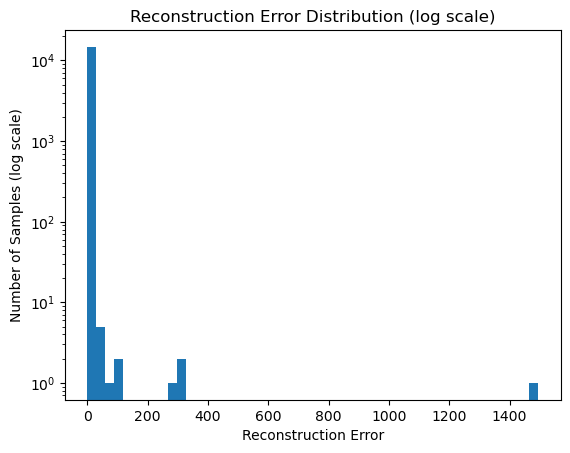

In [61]:
plt.hist(recon_error, bins=50)
plt.yscale('log')
plt.xlabel("Reconstruction Error")
plt.ylabel("Number of Samples (log scale)")
plt.title("Reconstruction Error Distribution (log scale)")
plt.show()

In [63]:
threshold = np.percentile(recon_error, 93)
print("Threshold:", threshold)
y_pred = (recon_error > threshold).astype(int)

Threshold: 0.023350297491997487


In [69]:
# Count the number of predicted anomalies
num_anomalies = np.sum(y_pred == 1)
print("Number of predicted anomalies:", num_anomalies)

Number of predicted anomalies: 1032


In [71]:
# Count the number of predicted anomalies
num_normal = np.sum(y_pred == 0)
print("Number of predicted anomalies:", num_normal)

Number of predicted anomalies: 13698


In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[13389   277]
 [  309   755]]


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13666
           1       0.73      0.71      0.72      1064

    accuracy                           0.96     14730
   macro avg       0.85      0.84      0.85     14730
weighted avg       0.96      0.96      0.96     14730



### Post (complete by Sunday Week 1)

Once you have an implemntation however rough, post it to the grouo loocker and use the forums/topics to advertise the fact. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

No posts should refer to Task 4.

This forms part of the overall assessment for the E-tivity. 

### Respond (complete by Wednesday Week 2)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

If you stick to the deadline then it will allow yourself and others to have enough time to implement suggestions. From the Schedule you can see that this is not a hard deadline.

The posts on the forum/topic associated with this e-tivity are graded. Below is a link to the rubrics.

https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=73310&rubricId=4445&originTool=quicklinks

### Task 4: VAE (completed by Sunday Week 2)

This task is a individual task and should **not** to be uploaded to the Group Locker. No direct support should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

Change the network to be a VAE. Again determine the optimal cutoff and plot the latent variables. Check how good the cutoffs were by constructing a confusion matrix or generating a classification report. Obviously for this task you need to use the Anom column.

**Hint** you can use the model topology from the AE (with the obvious modifications). I found that I had a good model (almost as good and the supervised learning model) when the KL divergence was small. You can print out both the KL divergence and reconstruction loss for each epoch. It can be tricky to train these type of models, so do not be surprised if you do not get a stellar result. What is more important is that you have the correct code to implement the VAE.

### Final Submission (complete by Sunday Week 2)

Submit Tasks 1-4 in a single notebook this before the deadline on Sunday.


In [33]:
## Add additional code cells to implememt the tasks stated above 

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.